<a href="https://colab.research.google.com/github/Derinhelm/treebank_statistics/blob/main/treebank_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting datasets

In [ ]:
from IPython.display import clear_output

## Russian

In [ ]:
!wget -m https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-a.conllu
!wget -m https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-b.conllu
!wget -m https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-c.conllu

!wget -m https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu


!wget -m https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-test.conllu
clear_output()

In [ ]:
!mv /content/raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-a.conllu /content/ru_syntagrus-ud-train-a.conllu
!mv /content/raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-b.conllu /content/ru_syntagrus-ud-train-b.conllu
!mv /content/raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-c.conllu /content/ru_syntagrus-ud-train-c.conllu

!mv /content/raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu /content/ru_syntagrus-ud-dev.conllu

!mv /content/raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-test.conllu /content/ru_syntagrus-ud-test.conllu
clear_output()

In [ ]:
!rm -r /content/raw.githubusercontent.com
clear_output()

rm: cannot remove '/content/raw.githubusercontent.com': No such file or directory


NameError: name 'clear_output' is not defined

## English

In [ ]:
!wget -m https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-train.conllu
!wget -m https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-dev.conllu
!wget -m https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu
clear_output()

In [ ]:
!mv /content/github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-train.conllu /content/en_ewt-ud-train.conllu
!mv /content/github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-dev.conllu /content/en_ewt-ud-dev.conllu
!mv /content/github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu /content/en_ewt-ud-test.conllu

clear_output()

In [ ]:
!rm -r /content/github.com
clear_output()

## Chinese

In [ ]:
!wget -m https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-train.conllu
!wget -m https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-dev.conllu
!wget -m https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-test.conllu
clear_output()

In [ ]:
!mv /content/github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-train.conllu /content/zh_gsd-ud-train.conllu
!mv /content/github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-dev.conllu /content/zh_gsd-ud-dev.conllu
!mv /content/github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-test.conllu /content/zh_gsd-ud-test.conllu
clear_output()

In [ ]:
!rm -r /content/github.com
clear_output()

# Word and Sentence storing

In [ ]:
class ConllEntry:
    def __init__(self, id, form, lemma, pos, cpos, feats=None, \
                 parent_id=None, relation=None,deps=None, misc=None):
        self.id = id
        self.form = form
        self.lemma = lemma
        self.pos = pos
        self.cpos = cpos
        self.feats = feats
        self.parent_id = parent_id
        self.relation = relation
        self.deps = deps
        self.misc = misc

In [ ]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.sent_id = ""
        self.words = []
        self.is_complex = False

    def add_word(self, word):
        self.words.append(word)

    def set_sent_id(self, sent_id):
        self.sent_id = sent_id

    def set_text(self, text):
        self.text = text

    def is_not_empty(self):
        return len(self.words) > 0

    def set_complex(self):
        self.is_complex = True

    def is_complex(self):
        return self.is_complex

# Reading info from files

В SynTagRus есть предложения с пропуском слов. Их пока записываем в complex_sents и не рассматриваем (потом, возможно, обработаем их отдельно).

In [ ]:
def read_conll(filename):
    fh = open(filename,'r',encoding='utf-8')
    sents_read = 0
    sents = []
    complex_sents = []
    comments = set()

    sent = Sentence()
    for line in fh:
        tok = line.strip().split('\t')
        if not tok or line.strip() == '': # empty line, add sentence to list
            if sent.is_not_empty:
                sents_read += 1
                if sent.is_complex:
                    complex_sents.append(sent)
                else:
                    sents.append(sent)
            sent = Sentence()
        else:
            if line[0] == '#' or '-' in tok[0]: # a comment line
                line = line.strip()
                if line[:12] == "# sent_id = ":
                    sent.set_sent_id(line[12:])
                elif line[:9] == "# text = ":
                    sent.set_text(line[9:])
                else:
                    comments.add(line)

            else: # an actual ConllEntry, add to tokens
                if tok[2] == "_":
                    tok[2] = tok[1].lower()

                word = ConllEntry(*tok)
                sent.add_word(word)
                if "." in tok[0]:
                    sent.set_complex()
    fh.close()
    return sents, complex_sents

In [ ]:
def create_lang_dicts():
  return {'rus': {'train': [], 'dev': [], 'test': []},
          'eng': {'train': [], 'dev': [], 'test': []},
          'chn': {'train': [], 'dev': [], 'test': []}}

In [ ]:
sents = create_lang_dicts()

In [ ]:
for f in ['train-a', 'train-b', 'train-c']:
    cur_sents, _ = read_conll("/content/ru_syntagrus-ud-" + f + ".conllu")
    sents['rus']['train'] += cur_sents
sents['rus']['dev'], _ = read_conll("/content/ru_syntagrus-ud-dev.conllu")
sents['rus']['test'], _ = read_conll("/content/ru_syntagrus-ud-test.conllu")

In [ ]:
sents['eng']['train'], _ = read_conll("/content/en_ewt-ud-train.conllu")
sents['eng']['dev'], _ = read_conll("/content/en_ewt-ud-dev.conllu")
sents['eng']['test'], _ = read_conll("/content/en_ewt-ud-test.conllu")

sents['chn']['train'], _ = read_conll("/content/zh_gsd-ud-train.conllu")
sents['chn']['dev'], _ = read_conll("/content/zh_gsd-ud-dev.conllu")
sents['chn']['test'], _ = read_conll("/content/zh_gsd-ud-test.conllu")

In [ ]:
for lang in sents.keys():
    print(lang, ":", [(k, len(v)) for k, v in sents[lang].items()])

rus : [('train', 68292), ('dev', 8691), ('test', 8589)]
eng : [('train', 12509), ('dev', 1998), ('test', 2075)]
chn : [('train', 3997), ('dev', 500), ('test', 500)]


# Глубина

In [ ]:
import networkx as nx

In [ ]:
def create_graph(sent):
  G = nx.DiGraph()
  G.add_node('0', word='root')
  for w in sent:
    G.add_node(w.id, word=w.form)
  for w in sent:
    G.add_edge(w.parent_id, w.id, dep_rel=w.relation)
  return G

In [ ]:
graphs = create_lang_dicts()
depth_stat = create_lang_dicts()
node_stat = create_lang_dicts()

In [ ]:
for lang in graphs.keys():
  for d in graphs[lang].keys():
    graphs[lang][d] = [create_graph(s.words) for s in sents[lang][d]]
    depth_stat[lang][d] = [len(nx.dag_longest_path(g)) for g in graphs[lang][d]]
    node_stat[lang][d] = [g.number_of_nodes() for g in graphs[lang][d]]

In [ ]:
for lang in depth_stat.keys():
  for d in depth_stat[lang].keys():
    print(lang, d, sum(depth_stat[lang][d]) / len(depth_stat[lang][d]))

rus train 6.077197914836291
rus dev 6.024277988723967
rus test 6.093724531377343
eng train 5.49780158286034
eng dev 4.936436436436437
eng test 4.805301204819277
chn train 6.282962221666249
chn dev 6.316
chn test 6.236


In [ ]:
for lang in node_stat.keys():
  for d in node_stat[lang].keys():
    print(lang, d, sum(node_stat[lang][d]) / len(node_stat[lang][d]))

rus train 18.185028993147075
rus dev 18.039005868139455
rus test 18.75678193037606
eng train 17.27044527939883
eng dev 13.546046046046046
eng test 13.067469879518072
chn train 25.672504378283712
chn dev 26.326
chn test 25.024


In [ ]:
import matplotlib.pyplot as plt


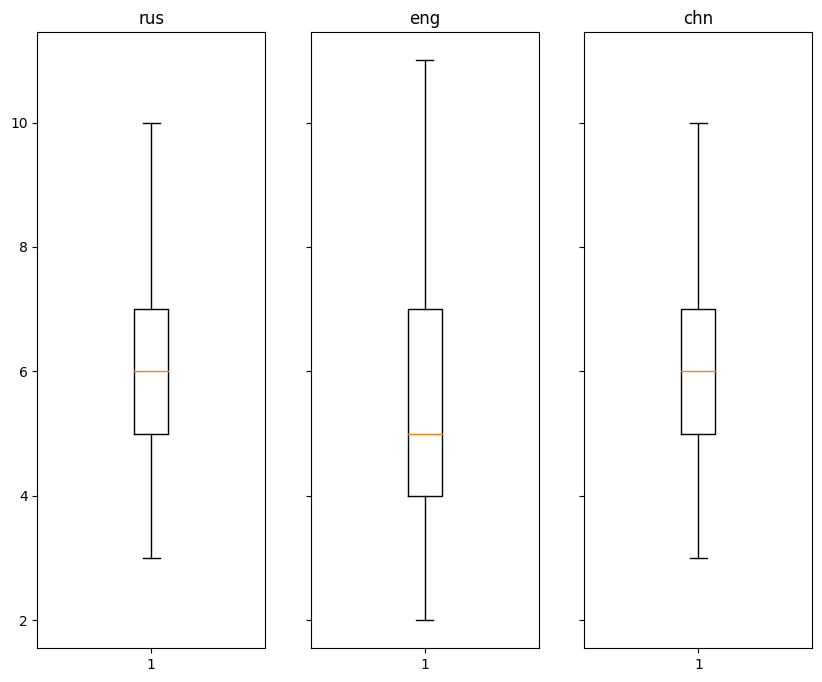

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (10,8), sharey=True)

for col_i, lang in enumerate(depth_stat.keys()):
        ax[col_i].boxplot(x=depth_stat[lang]['train'] + depth_stat[lang]['dev'] + depth_stat[lang]['test'], showfliers=False,showcaps=True)
        ax[col_i].title.set_text(lang)

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x793bf135dab0>,
 'caps': [<matplotlib.lines.Line2D at 0x793bf135dff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x793bf135d6f0>],
 'medians': [<matplotlib.lines.Line2D at 0x793bf135e530>],
 'fliers': [],
 'means': []}

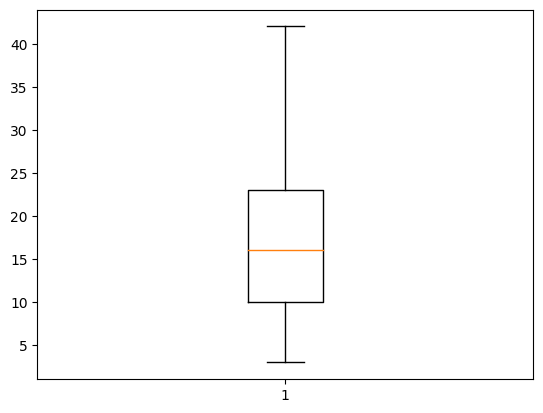

In [ ]:
plt.boxplot(node_stat['rus']['dev'], showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x793bf13c92a0>,
 'caps': [<matplotlib.lines.Line2D at 0x793bf13c9750>,
 'boxes': [<matplotlib.lines.Line2D at 0x793bf13c9000>,
 'medians': [<matplotlib.lines.Line2D at 0x793bf13c9c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x793bf13c9f30>,
 'means': []}

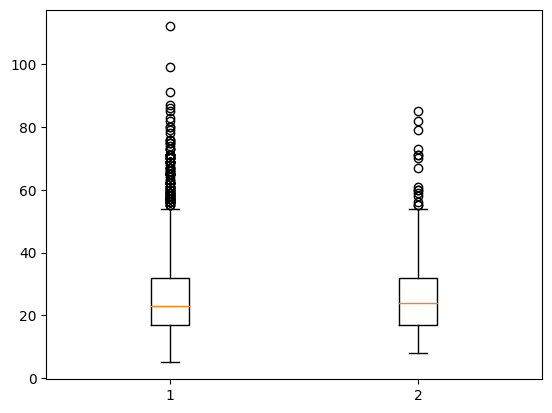

In [ ]:
plt.boxplot([node_stat[lang]['train'], node_stat[lang]['dev']])


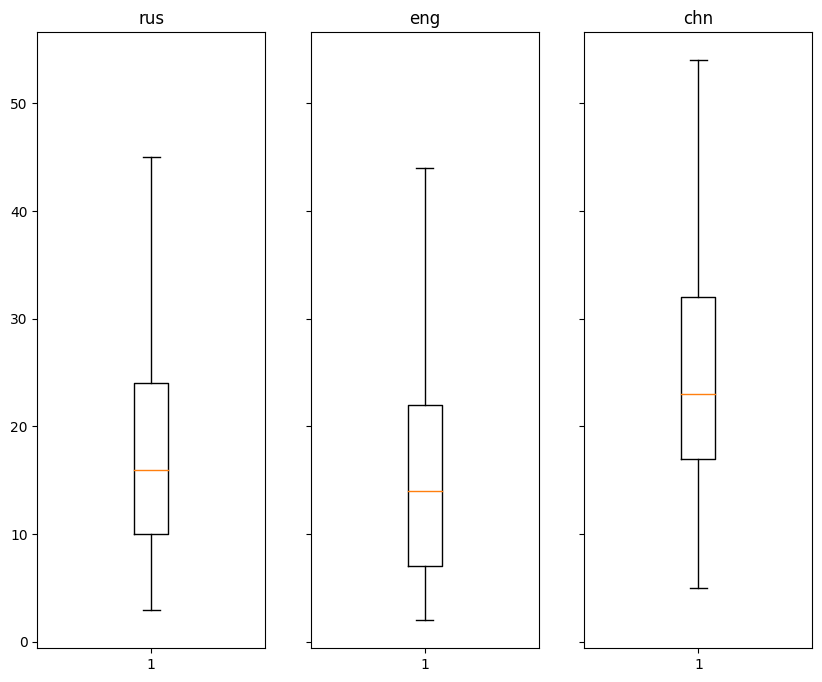

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (10,8), sharey=True)

for col_i, lang in enumerate(node_stat.keys()):
        ax[col_i].boxplot(x=node_stat[lang]['train'] + node_stat[lang]['dev'] + node_stat[lang]['test'], showfliers=False,showcaps=True)
        ax[col_i].title.set_text(lang)

plt.show()

# word depth

In [ ]:
def get_word_depths(graphs, sents):
    res = []
    for i in range(len(graphs)):
        cur_sent_depths = []
        sent = sents[i]
        g = graphs[i]
        for w in sent.words:
            w_depth = nx.shortest_path_length(g, '0', w.id)
            cur_sent_depths.append(w_depth)
        res.append(cur_sent_depths)
    return res

In [ ]:
word_depths = create_lang_dicts()
flatten_word_depths = create_lang_dicts()
for lang in graphs.keys():
  for d in graphs[lang].keys():
    word_depths[lang][d] = get_word_depths(graphs[lang][d], sents[lang][d])
    flatten_word_depths[lang][d] = [element
                                    for nestedlist in word_depths[lang][d]
                                    for element in nestedlist]

In [ ]:
for lang in flatten_word_depths.keys():
  for d in flatten_word_depths[lang].keys():
    print(lang, d, sum(flatten_word_depths[lang][d]) / len(flatten_word_depths[lang][d]))

rus train 3.592264826175869
rus dev 3.607687424874735
rus test 3.589497288755713
eng train 3.4482992428522996
eng dev 3.1839470219810906
eng test 3.1913338658146966
chn train 3.4271010789324245
chn dev 3.4263602621811575
chn test 3.3933566433566433


## Word grouping into pandas

In [ ]:
import pandas as pd

In [ ]:
def create_node_df(cur_sents, cur_word_depths):
    info = []
    for sent_i, sent in enumerate(cur_sents):
      for w_i, w in enumerate(sent.words):
        info.append((w.parent_id, w.relation, w.pos, cur_word_depths[sent_i][w_i], w.form, w.lemma, sent_i))
    info_df = pd.DataFrame(info, columns=["parent_id", "relation", "pos", "word_depth", "form", "lemma", "sent_i"])
    return info_df

In [ ]:
node_df_dict = create_lang_dicts()
for lang in node_df_dict.keys():
  for d in node_df_dict[lang].keys():
    node_df_dict[lang][d] = create_node_df(sents[lang][d], word_depths[lang][d])

In [ ]:
def create_boxplots(df_column):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (10,8), sharex=True, sharey=True)

    for col_i, lang in enumerate(node_df_dict.keys()):
        for row_i, d in enumerate(node_df_dict[lang].keys()):
            ax[row_i][col_i].boxplot(x=node_df_dict[lang][d][df_column], showfliers=False)
            ax[row_i][col_i].title.set_text(lang + "_" + d)

    plt.show()

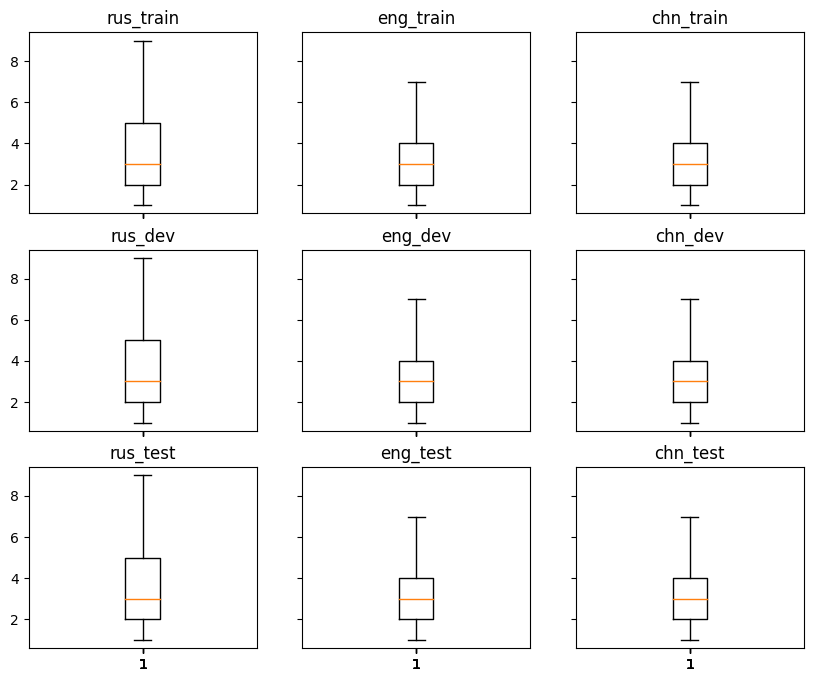

In [ ]:
create_boxplots("word_depth")

In [ ]:
node_df_dict_all = create_lang_dicts()
for lang in node_df_dict_all.keys():
    node_df_dict_all[lang] = create_node_df(sents[lang]['train'] + sents[lang]['dev'] + sents[lang]['test'],
                             word_depths[lang]['train'] + word_depths[lang]['dev'] + word_depths[lang]['test'])

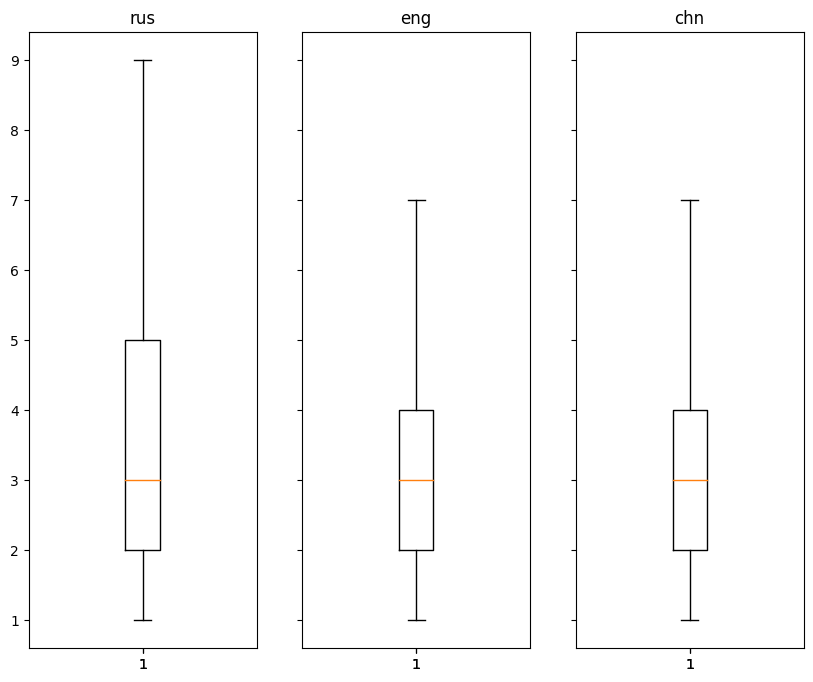

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (10,8), sharex=True, sharey=True)

for col_i, lang in enumerate(node_df_dict_all.keys()):
        ax[col_i].boxplot(x=node_df_dict_all[lang]["word_depth"], showfliers=False)
        ax[col_i].title.set_text(lang)

plt.show()

In [ ]:
from collections import Counter

In [ ]:
rus_depth_counter = Counter(node_df_dict_all['rus']["word_depth"])

In [ ]:
rus_depth_counter

Counter({1: 85572,
         2: 359127,
         4: 274770,
         3: 381850,
         5: 174050,
         6: 99124,
         7: 52129,
         8: 26047,
         9: 11948,
         10: 5317,
         11: 2420,
         12: 1052,
         13: 467,
         14: 186,
         15: 82,
         16: 28,
         17: 10,
         18: 9,
         19: 7,
         21: 2,
         20: 2})

In [ ]:
l = sum(rus_depth_counter.values())

In [ ]:
y = {2:1, 3:2}
sorted(y.items(), key=lambda x: x[0])

[(2, 1), (3, 2)]

In [ ]:
sum(node_df_dict_all['rus']['word_depth'])

5297575

rus [(1, 0.016153051160200656), (2, 0.06779082882262168), (3, 0.07208014987989787), (4, 0.051867127883984655), (5, 0.0328546551960095), (6, 0.018711202767303908), (7, 0.009840162715959661), (8, 0.004916777959726856), (9, 0.002255371561516354), (10, 0.0010036667720608014), (11, 0.0004568127869827232), (12, 0.00019858142640736564), (13, 8.815354195079824e-05), (14, 3.511040428875476e-05), (15, 1.5478780385365002e-05), (16, 5.2854372047587815e-06), (17, 1.8876561445567076e-06), (18, 1.6988905301010367e-06), (19, 1.3213593011896954e-06), (20, 3.775312289113415e-07), (21, 3.775312289113415e-07)]
eng [(1, 0.019246818216111752), (2, 0.07707780789163654), (3, 0.08068876262992647), (4, 0.055409758050943364), (5, 0.03233145105595181), (6, 0.016303269126975377), (7, 0.007496996674578809), (8, 0.0034171169236662043), (9, 0.0014532032569395678), (10, 0.0005617814507657754), (11, 0.00020312345843803863), (12, 9.517784909668096e-05), (13, 4.41068081179741e-05), (14, 3.0178342396508598e-05), (15, 2.78

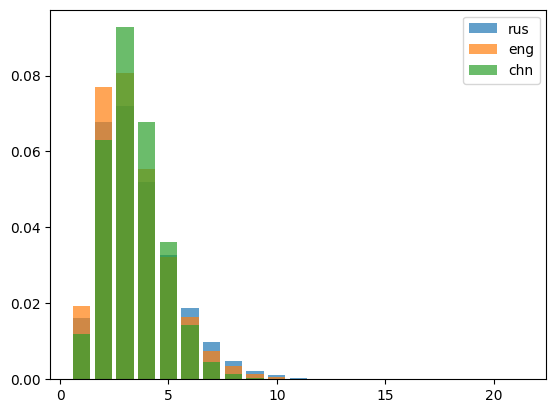

In [ ]:
x = {'rus': [], 'eng': [], 'chn':[]}
y = {'rus': [], 'eng': [], 'chn':[]}
for lang in node_df_dict_all.keys():
  l = sum(node_df_dict_all[lang]['word_depth'])
  for k, v in sorted(Counter(node_df_dict_all[lang]["word_depth"]).items(), key=lambda x: x[0]):
    x[lang].append(k)
    y[lang].append(v/l)
  print(lang, list(zip(x[lang], y[lang])))
  plt.bar(x[lang], height=y[lang], alpha=0.7)
plt.legend(['rus', 'eng', 'chn'])
plt.show()


In [ ]:
for lang, node_df_lang in node_df_dict_all.items():
  print(lang, len(set(node_df_dict_all[lang]['lemma'])) / len(node_df_dict_all[lang]))

rus 0.03606229552455265
eng 0.06659990379838665
chn 0.1636291375688412


In [ ]:
node_df_dict_all[lang][['sent_i', 'word_depth']].groupby('sent_i').mean().columns

Index(['word_depth'], dtype='object')

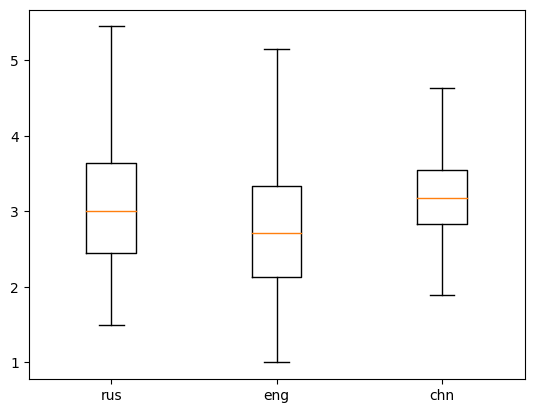

In [ ]:
boxplot_list = []
for i, lang in enumerate(['rus', 'eng', 'chn']):
  boxplot_list.append(node_df_dict_all[lang][['sent_i', 'word_depth']].groupby('sent_i').mean()['word_depth'])
plt.boxplot(boxplot_list, showfliers=False, labels=['rus', 'eng', 'chn'])
plt.show()

In [ ]:
graphs['rus']['train'][0]

In [ ]:
from networkx.algorithms import isomorphism as iso

In [ ]:
iso.tree_isomorphism(graphs['rus']['train'][0], graphs['rus']['train'][1])

NetworkXNotImplemented: not implemented for directed type

In [ ]:
nx.weisfeiler_lehman_graph_hash(graphs['rus']['train'][0])

'58916e5534b845124ae54d8a8b4d2c07'

In [ ]:
info_df.groupby("relation").word_depth.mean()

relation
acl              4.042243
acl:relcl        3.994823
advcl            2.793349
advmod           3.436040
amod             4.494379
appos            4.162159
aux              3.117075
aux:pass         3.008981
case             4.444587
cc               4.304084
ccomp            2.581978
compound         5.216276
conj             3.739500
cop              2.895257
csubj            2.740337
csubj:pass       2.619632
dep              3.000000
det              4.248919
discourse        3.139121
dislocated       3.166667
expl             2.501896
fixed            4.783490
flat             4.089178
flat:foreign     4.258101
flat:name        4.592189
iobj             3.352953
list             6.000000
mark             3.769283
nmod             4.355170
nsubj            2.797501
nsubj:outer      2.285714
nsubj:pass       2.886842
nummod           4.362580
nummod:entity    4.464945
nummod:gov       3.932437
obj              3.421643
obl              3.307963
obl:agent        4.185501
obl

In [ ]:
info_df.groupby("pos").word_depth.mean()

pos
ADJ      4.178393
ADP      4.434999
ADV      3.271898
AUX      2.979736
CCONJ    4.300878
DET      4.179239
INTJ     2.297143
NOUN     3.528171
NUM      4.091218
PART     3.610305
PRON     3.295790
PROPN    3.894594
PUNCT    3.545610
SCONJ    3.865085
SYM      3.376691
VERB     2.374624
X        4.204762
Name: word_depth, dtype: float64

In [ ]:
rel_counter_dict = {}
for lang in ['rus', 'eng', 'chn']:
  rel_counter_dict[lang] = Counter(node_df_dict_all[lang]['relation'])

In [ ]:
rel_counter_dict.keys()

dict_keys(['rus', 'eng', 'chn'])

In [ ]:
[(lang, len(c.keys())) for lang, c in rel_counter_dict.items()]

[('rus', 45), ('eng', 52), ('chn', 43)]

In [ ]:
rel_set = {r for c in rel_counter_dict.values() for r in c}

In [ ]:
len(rel_set)

63

In [ ]:
node_stat = {lang: rel_counter.total() for lang, rel_counter in rel_counter_dict.items()}

In [ ]:
node_stat

{'rus': 1474199, 'eng': 253634, 'chn': 123291}

In [ ]:
rel_info = []
labels = []
for r in rel_set:
  rel_stat = {}
  for lang, counter in rel_counter_dict.items():
    rel_stat[lang] = counter[r] / node_stat[lang]
  rel_info.append(rel_stat)
  labels.append(r)
rel_df = pd.DataFrame(rel_info, index=labels)

In [ ]:
[rel_df['rus'] > 0.1 or rel_df['eng'] > 0.1 or rel_df['chn'] > 0.1]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
border = 0.05
frequent_rel_df = rel_df[(rel_df['rus'] > border) | (rel_df['eng'] > border) | (rel_df['chn'] > border)].round(3)

In [ ]:
frequent_rel_df

,rus,eng,chn
punct,0.184,0.116,0.138
det,0.025,0.076,0.012
root,0.058,0.065,0.041
case,0.092,0.084,0.074
nummod,0.006,0.012,0.051
nmod,0.082,0.033,0.132
nsubj,0.068,0.078,0.076
advmod,0.064,0.055,0.026
obl,0.081,0.042,0.027
amod,0.080,0.048,0.017


<Axes: >

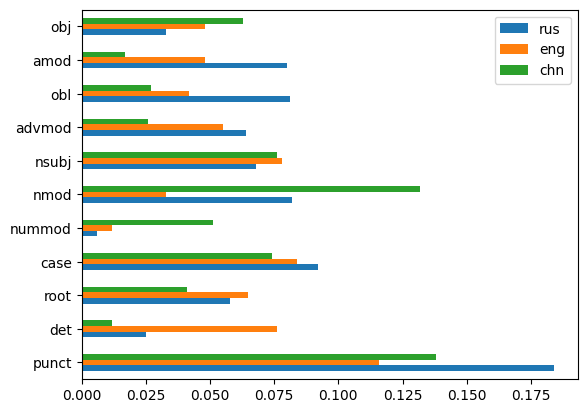

In [ ]:
frequent_rel_df.plot.barh()

<Axes: >

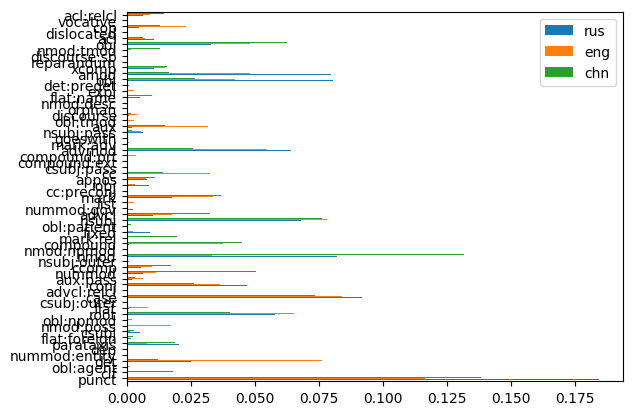

In [ ]:
rel_df.plot.barh()

In [ ]:
zero_rel_df = rel_df[(rel_df['rus'] == 0) | (rel_df['eng'] == 0) | (rel_df['chn'] == 0)].round(3)

In [ ]:
len(zero_rel_df)

31

In [ ]:
from copy import deepcopy
info_df = deepcopy(node_df_dict['rus']['train'])
for column in ["relation", "pos"]:
  info_df[column] = pd.factorize(info_df[column])[0]

import matplotlib.pyplot as plt

plt.matshow(info_df[["parent_id", "relation", "pos", "word_depth"]].corr())
plt.show()


In [ ]:
from collections import Counter

def get_relations(sents):
    rel = [w.relation for s in sents for w in s.words]
    return Counter(rel)

rel_counters = {}
for f in sents:
    rel_counters[f] = get_relations(sents[f])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for f, counter in rel_counters.items():
    x, y = [], []
    for x1, y1 in counter.most_common():
      x.append(x1)
      y.append(y1)
    fig = plt.figure(figsize=(10, 18))
    ax = fig.add_subplot()

    bars = ax.barh(x, y, height=0.7)
    ax.bar_label(bars)

    plt.show()
    fig = plt.figure(figsize=(10, 18))
    ax = fig.add_subplot()

    bars = ax.pie(y, labels=x, autopct='%1.1f%%')

    plt.show()

In [ ]:
from collections import Counter
syntagrus_depth_relative_rate = {}
syntagrus_all = len(syntagrus_train_graphs)
syntagrus_depth_relative_rate = {depth: abs_rate / syntagrus_all for depth, abs_rate in Counter(syntagrus_train_depths).items()}
syntagrus_avg_depth = sum([depth * rel_rate for depth, rel_rate in syntagrus_depth_relative_rate.items()])

In [ ]:
import matplotlib.pyplot as plt
vals = syntagrus_depth_relative_rate.values()
labels = syntagrus_depth_relative_rate.keys()
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")